# Занятие 5.
# Компоненты RAG

In [ ]:
%pip install langchain sentence_transformers langchain_huggingface langchain_community unstructured nltk==3.9.1
%pip install jq pypdf langchain_chroma rank_bm25 arxiv langchain_openai scikit-learn

## Document loaders

Use document loaders to load data from a source as Document's.  
A Document is a piece of text and associated metadata. For example, there are document loaders for loading a simple .txt file, for loading the text contents of any web page, or even for loading a transcript of a YouTube video.

Document loaders provide a "load" method for loading data as documents from a configured source. They optionally implement a "lazy load" as well for lazily loading data into memory.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.find('tokenizers/punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


FileSystemPathPointer('/root/nltk_data/tokenizers/punkt_tab')

In [ ]:
!wget https://raw.githubusercontent.com/langchain-ai/langchain/refs/heads/master/libs/community/tests/examples/mlb_teams_2012.csv
!wget https://raw.githubusercontent.com/langchain-ai/langchain/refs/heads/master/docs/docs/integrations/document_loaders/example_data/fake-content.html
!wget https://raw.githubusercontent.com/langchain-ai/langchain/0640cbf2f126f773b7ae78b0f94c1ba0caabb2c1/docs/docs/integrations/document_loaders/example_data/facebook_chat.json
!wget https://raw.githubusercontent.com/langchain-ai/langchain/9a277cbe007706b48fa98787ab85a11c59ccba2e/docs/docs/integrations/document_loaders/example_data/layout-parser-paper.pdf
!wget https://raw.githubusercontent.com/langchain-ai/langchain/refs/heads/master/docs/docs/how_to/state_of_the_union.txt

--2024-10-26 12:37:22--  https://raw.githubusercontent.com/langchain-ai/langchain/refs/heads/master/libs/community/tests/examples/mlb_teams_2012.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 848 [text/plain]
Saving to: ‘mlb_teams_2012.csv’

mlb_teams_2012.csv  100%[===================>]     848  --.-KB/s    in 0s      

2024-10-26 12:37:22 (32.9 MB/s) - ‘mlb_teams_2012.csv’ saved [848/848]

--2024-10-26 12:37:22--  https://raw.githubusercontent.com/langchain-ai/langchain/refs/heads/master/docs/docs/integrations/document_loaders/example_data/fake-content.html
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199

In [ ]:
import nltk
import json

from pathlib import Path
from pprint import pprint


from langchain_community.document_loaders import JSONLoader
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.document_loaders import BSHTMLLoader
from langchain_community.document_loaders.csv_loader import CSVLoader
from langchain_community.document_loaders import UnstructuredHTMLLoader

In [ ]:
MLB_FILE_NAME = 'mlb_teams_2012.csv'
HTML_FILE_NAME = 'fake-content.html'
JSON_FILE_PATH = 'facebook_chat.json'
PDF_FILE_PATH = "layout-parser-paper.pdf"

### CSVLoader

In [ ]:
loader = CSVLoader(file_path=MLB_FILE_NAME)
data = loader.load()
data[:3]

[Document(metadata={'source': 'mlb_teams_2012.csv', 'row': 0}, page_content='Team: Nationals\n"Payroll (millions)": 81.34\n"Wins": 98'),
 Document(metadata={'source': 'mlb_teams_2012.csv', 'row': 1}, page_content='Team: Reds\n"Payroll (millions)": 82.20\n"Wins": 97'),
 Document(metadata={'source': 'mlb_teams_2012.csv', 'row': 2}, page_content='Team: Yankees\n"Payroll (millions)": 197.96\n"Wins": 95')]

In [ ]:
loader = CSVLoader(file_path=MLB_FILE_NAME, csv_args={
    'delimiter': ',',
    'quotechar': '"',
    'fieldnames': ['MLB Team', 'Payroll in millions', 'Wins']
})

data = loader.load()
data[:3]

[Document(metadata={'source': 'mlb_teams_2012.csv', 'row': 0}, page_content='MLB Team: Team\nPayroll in millions: "Payroll (millions)"\nWins: "Wins"'),
 Document(metadata={'source': 'mlb_teams_2012.csv', 'row': 1}, page_content='MLB Team: Nationals\nPayroll in millions: 81.34\nWins: 98'),
 Document(metadata={'source': 'mlb_teams_2012.csv', 'row': 2}, page_content='MLB Team: Reds\nPayroll in millions: 82.20\nWins: 97')]

In [ ]:
loader = CSVLoader(file_path=MLB_FILE_NAME, source_column="Team")

data = loader.load()
data[:3]

[Document(metadata={'source': 'Nationals', 'row': 0}, page_content='Team: Nationals\n"Payroll (millions)": 81.34\n"Wins": 98'),
 Document(metadata={'source': 'Reds', 'row': 1}, page_content='Team: Reds\n"Payroll (millions)": 82.20\n"Wins": 97'),
 Document(metadata={'source': 'Yankees', 'row': 2}, page_content='Team: Yankees\n"Payroll (millions)": 197.96\n"Wins": 95')]

### HTML Loader

In [ ]:
loader = UnstructuredHTMLLoader(HTML_FILE_NAME)
data = loader.load()
data

[Document(metadata={'source': 'fake-content.html'}, page_content='My First Heading\n\nMy first paragraph.')]

In [ ]:
#beautifulsoup
loader = BSHTMLLoader(HTML_FILE_NAME)
data = loader.load()
data

[Document(metadata={'source': 'fake-content.html', 'title': 'Test Title'}, page_content='\nTest Title\n\n\nMy First Heading\nMy first paragraph.\n\n\n')]

### JSON Loader

In [ ]:
data = json.loads(Path(JSON_FILE_PATH).read_text())

In [ ]:
pprint(data)

{'image': {'creation_timestamp': 1675549016, 'uri': 'image_of_the_chat.jpg'},
 'is_still_participant': True,
 'joinable_mode': {'link': '', 'mode': 1},
 'magic_words': [],
 'messages': [{'content': 'Bye!',
               'sender_name': 'User 2',
               'timestamp_ms': 1675597571851},
              {'content': 'Oh no worries! Bye',
               'sender_name': 'User 1',
               'timestamp_ms': 1675597435669},
              {'content': 'No Im sorry it was my mistake, the blue one is not '
                          'for sale',
               'sender_name': 'User 2',
               'timestamp_ms': 1675596277579},
              {'content': 'I thought you were selling the blue one!',
               'sender_name': 'User 1',
               'timestamp_ms': 1675595140251},
              {'content': 'Im not interested in this bag. Im interested in the '
                          'blue one!',
               'sender_name': 'User 1',
               'timestamp_ms': 1675595109305},
   

In [ ]:
# Define the metadata extraction function.
def metadata_func(record: dict, metadata: dict) -> dict:

    metadata["sender_name"] = record.get("sender_name")
    metadata["timestamp_ms"] = record.get("timestamp_ms")

    return metadata


loader = JSONLoader(
    file_path=JSON_FILE_PATH,
    jq_schema='.messages[]',
    content_key="content",
    metadata_func=metadata_func
)

data = loader.load()
data[:4]

[Document(metadata={'source': '/content/facebook_chat.json', 'seq_num': 1, 'sender_name': 'User 2', 'timestamp_ms': 1675597571851}, page_content='Bye!'),
 Document(metadata={'source': '/content/facebook_chat.json', 'seq_num': 2, 'sender_name': 'User 1', 'timestamp_ms': 1675597435669}, page_content='Oh no worries! Bye'),
 Document(metadata={'source': '/content/facebook_chat.json', 'seq_num': 3, 'sender_name': 'User 2', 'timestamp_ms': 1675596277579}, page_content='No Im sorry it was my mistake, the blue one is not for sale'),
 Document(metadata={'source': '/content/facebook_chat.json', 'seq_num': 4, 'sender_name': 'User 1', 'timestamp_ms': 1675595140251}, page_content='I thought you were selling the blue one!')]

In [ ]:
len(data)

11

### PyPDF Loader

In [ ]:
loader = PyPDFLoader(PDF_FILE_PATH)
pages = loader.load_and_split()
pages[:1]

[Document(metadata={'source': 'layout-parser-paper.pdf', 'page': 0}, page_content='LayoutParser : A Uniﬁed Toolkit for Deep\nLearning Based Document Image Analysis\nZejiang Shen1( \x00), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain\nLee4, Jacob Carlson3, and Weining Li5\n1Allen Institute for AI\nshannons@allenai.org\n2Brown University\nruochen zhang@brown.edu\n3Harvard University\n{melissadell,jacob carlson }@fas.harvard.edu\n4University of Washington\nbcgl@cs.washington.edu\n5University of Waterloo\nw422li@uwaterloo.ca\nAbstract. Recent advances in document image analysis (DIA) have been\nprimarily driven by the application of neural networks. Ideally, research\noutcomes could be easily deployed in production and extended for further\ninvestigation. However, various factors like loosely organized codebases\nand sophisticated model conﬁgurations complicate the easy reuse of im-\nportant innovations by a wide audience. Though there have been on-going\neﬀorts to improve reusab

In [ ]:
len(pages)

16

## Сплиттеры

### CharacterTextSplitter

In [ ]:
from langchain_text_splitters import CharacterTextSplitter


#### Определим свою кастомную функцию вычисления длины строки

In [ ]:
def custom_length_function(string):
  return int(len(string)*1.2)# string.count('e')

In [ ]:
text_splitter = CharacterTextSplitter(
    separator="",
    chunk_size=500,
    chunk_overlap=200,
    length_function=custom_length_function
)

In [ ]:
len(pages[0].page_content)

2280

In [ ]:
len(pages), len(text_splitter.split_documents(pages))

(16, 139)

In [ ]:
text_splitter.split_text(pages[0].page_content)

['LayoutParser : A Uniﬁed Toolkit for Deep\nLearning Based Document Image Analysis\nZejiang Shen1( \x00), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain\nLee4, Jacob Carlson3, and Weining Li5\n1Allen Institute for AI\nshannons@allenai.org\n2Brown University\nruochen zhang@brown.edu\n3Harvard University\n{melissadell,jacob carlson }@fas.harvard.edu\n4University of Washington\nbcgl@cs.washington.edu\n5University of Waterloo\nw422li@uwaterloo.ca\nAbstract. Recent advances in document image analysis (DIA) hav',
 '{melissadell,jacob carlson }@fas.harvard.edu\n4University of Washington\nbcgl@cs.washington.edu\n5University of Waterloo\nw422li@uwaterloo.ca\nAbstract. Recent advances in document image analysis (DIA) have been\nprimarily driven by the application of neural networks. Ideally, research\noutcomes could be easily deployed in production and extended for further\ninvestigation. However, various factors like loosely organized codebases\nand sophisticated model conﬁgurations co

#### Можем объединить метадату с полученными кусками текста

In [ ]:
splited_texts = text_splitter.split_text(pages[0].page_content)

metadatas = [{"document": n, 'length':len(j)} for n,j in enumerate(splited_texts)]
metadatas

[{'document': 0, 'length': 500},
 {'document': 1, 'length': 500},
 {'document': 2, 'length': 500},
 {'document': 3, 'length': 499},
 {'document': 4, 'length': 500},
 {'document': 5, 'length': 500},
 {'document': 6, 'length': 480}]

In [ ]:
created_documents = text_splitter.create_documents(
    texts=splited_texts, metadatas=metadatas
)
created_documents[:3]

[Document(metadata={'document': 0, 'length': 500}, page_content='LayoutParser : A Uniﬁed Toolkit for Deep\nLearning Based Document Image Analysis\nZejiang Shen1( \x00), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain\nLee4, Jacob Carlson3, and Weining Li5\n1Allen Institute for AI\nshannons@allenai.org\n2Brown University\nruochen zhang@brown.edu\n3Harvard University\n{melissadell,jacob carlson }@fas.harvard.edu\n4University of Washington\nbcgl@cs.washington.edu\n5University of Waterloo\nw422li@uwaterloo.ca\nAbstract. Recent advances in document image analysis (DIA) hav'),
 Document(metadata={'document': 1, 'length': 500}, page_content='{melissadell,jacob carlson }@fas.harvard.edu\n4University of Washington\nbcgl@cs.washington.edu\n5University of Waterloo\nw422li@uwaterloo.ca\nAbstract. Recent advances in document image analysis (DIA) have been\nprimarily driven by the application of neural networks. Ideally, research\noutcomes could be easily deployed in production and extended 

### TokenizerTextSplitter

In [ ]:
from transformers import GPT2TokenizerFast

tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
text_splitter_hf_tokenizer = CharacterTextSplitter.from_huggingface_tokenizer(
    tokenizer, chunk_size=10, chunk_overlap=5
)
texts = text_splitter_hf_tokenizer.split_text(created_documents[0].page_content)
len(texts)

1

In [ ]:
texts

['LayoutParser : A Uniﬁed Toolkit for Deep\nLearning Based Document Image Analysis\nZejiang Shen1( \x00), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain\nLee4, Jacob Carlson3, and Weining Li5\n1Allen Institute for AI\nshannons@allenai.org\n2Brown University\nruochen zhang@brown.edu\n3Harvard University\n{melissadell,jacob carlson }@fas.harvard.edu\n4University of Washington\nbcgl@cs.washington.edu\n5University of Waterloo\nw422li@uwaterloo.ca\nAbstract. Recent advances in document image analysis (DIA) hav']

In [ ]:
created_documents[0].page_content

'LayoutParser : A Uniﬁed Toolkit for Deep\nLearning Based Document Image Analysis\nZejiang Shen1( \x00), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain\nLee4, Jacob Carlson3, and Weining Li5\n1Allen Institute for AI\nshannons@allenai.org\n2Brown University\nruochen zhang@brown.edu\n3Harvard University\n{melissadell,jacob carlson }@fas.harvard.edu\n4University of Washington\nbcgl@cs.washington.edu\n5University of Waterloo\nw422li@uwaterloo.ca\nAbstract. Recent advances in document image analysis (DIA) hav'

### RecursiveCharacterTextSplitter

Этот разделитель текста рекомендуется использовать для обычного текста. Он параметризуется списком разделительных символов.  
Сплиттер пытается разделить текст по разделительным символам слева направо, пока фрагменты не станут достаточно маленькими. По умолчанию используется список ["\n\n", "\n", " ", """].  
Это приводит к тому, что все абзацы (а затем предложения и слова) стараются как можно дольше сохранять вместе, поскольку в целом они кажутся наиболее семантически связанными фрагментами текста.

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    # separators=['\n'],
    chunk_size=100,
    chunk_overlap=20,
    length_function=len,
    is_separator_regex=False,
)

In [ ]:
created_documents[0].page_content

'LayoutParser : A Uniﬁed Toolkit for Deep\nLearning Based Document Image Analysis\nZejiang Shen1( \x00), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain\nLee4, Jacob Carlson3, and Weining Li5\n1Allen Institute for AI\nshannons@allenai.org\n2Brown University\nruochen zhang@brown.edu\n3Harvard University\n{melissadell,jacob carlson }@fas.harvard.edu\n4University of Washington\nbcgl@cs.washington.edu\n5University of Waterloo\nw422li@uwaterloo.ca\nAbstract. Recent advances in document image analysis (DIA) hav'

In [ ]:
# len(text_splitter.split_text('1'*1500))

In [ ]:
texts = text_splitter.split_text(created_documents[0].page_content)
len(texts)

7

In [ ]:
[len(t) for t in texts]

[79, 74, 82, 61, 90, 66, 82]

### Recursively split JSON

Этот разделитель json сначала просматривает глубину данных json и создает меньшие фрагменты json. Он пытается сохранить вложенные объекты json целыми, но при необходимости разбивает их, чтобы сохранить фрагменты размером от min_chunk_size до max_chunk_size. Если значение не является вложенным json-файлом, а представляет собой строку очень большого размера, то строка не будет разделена. Если вам нужно жестко ограничить размер фрагмента, попробуйте использовать рекурсивное разделение текста на эти фрагменты. Существует необязательный шаг предварительной обработки для разделения списков: сначала преобразуйте их в формат json (dict), а затем разделите их как таковые.

In [ ]:
import requests, json
from langchain_text_splitters import RecursiveJsonSplitter


In [ ]:
json_data = requests.get("https://api.smith.langchain.com/openapi.json").json()
splitter = RecursiveJsonSplitter(min_chunk_size=295, max_chunk_size=300)

In [ ]:
# pprint(json_data)

In [ ]:
json_chunks = splitter.split_json(json_data=json_data)

In [ ]:
json_chunks[:3]

[{'openapi': '3.1.0',
  'info': {'title': 'LangSmith', 'version': '0.1.0'},
  'paths': {'/api/v1/sessions/{session_id}': {'get': {'tags': ['tracer-sessions'],
     'summary': 'Read Tracer Session',
     'description': 'Get a specific session.',
     'operationId': 'read_tracer_session_api_v1_sessions__session_id__get'}}}},
 {'paths': {'/api/v1/sessions/{session_id}': {'get': {'security': [{'API Key': []},
      {'Tenant ID': []},
      {'Bearer Auth': []}],
     'parameters': [{'name': 'session_id',
       'in': 'path',
       'required': True,
       'schema': {'type': 'string', 'format': 'uuid', 'title': 'Session Id'}},
      {'name': 'include_stats',
       'in': 'query',
       'required': False,
       'schema': {'type': 'boolean',
        'default': False,
        'title': 'Include Stats'}},
      {'name': 'accept',
       'in': 'header',
       'required': False,
       'schema': {'anyOf': [{'type': 'string'}, {'type': 'null'}],
        'title': 'Accept'}}]}}}},
 {'paths': {'/ap

### Split code

In [ ]:
from langchain_text_splitters import (
    Language,
    RecursiveCharacterTextSplitter,
)

In [ ]:
PYTHON_CODE = """
def hello_world():
    print("Hello, World!")

# Call the function
hello_world()
"""
python_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.PYTHON, chunk_size=50, chunk_overlap=0
)
python_docs = python_splitter.create_documents([PYTHON_CODE])
for d in python_docs:
  print(d.page_content)
  print('__')

def hello_world():
    print("Hello, World!")
__
# Call the function
hello_world()
__


In [ ]:
# посмотрим разделители для Python:

RecursiveCharacterTextSplitter.get_separators_for_language(Language.PYTHON)

['\nclass ', '\ndef ', '\n\tdef ', '\n\n', '\n', ' ', '']

In [ ]:
# посмотрим список доступных языков
[e.value for e in Language]

['cpp',
 'go',
 'java',
 'kotlin',
 'js',
 'ts',
 'php',
 'proto',
 'python',
 'rst',
 'ruby',
 'rust',
 'scala',
 'swift',
 'markdown',
 'latex',
 'html',
 'sol',
 'csharp',
 'cobol',
 'c',
 'lua',
 'perl',
 'haskell',
 'elixir',
 'powershell']

## Эмбеддеры

Есть много бенчмарков для сравнения качества энкодеров.  
Для сравнения качества работы энкодеров на русском языке наиболее популярными бенчмарками являются:
* https://github.com/embeddings-benchmark/mteb (https://habr.com/ru/companies/sberdevices/articles/831150/)
* https://github.com/avidale/encodechka?tab=readme-ov-file (https://habr.com/ru/articles/669674/)


ruMTEB

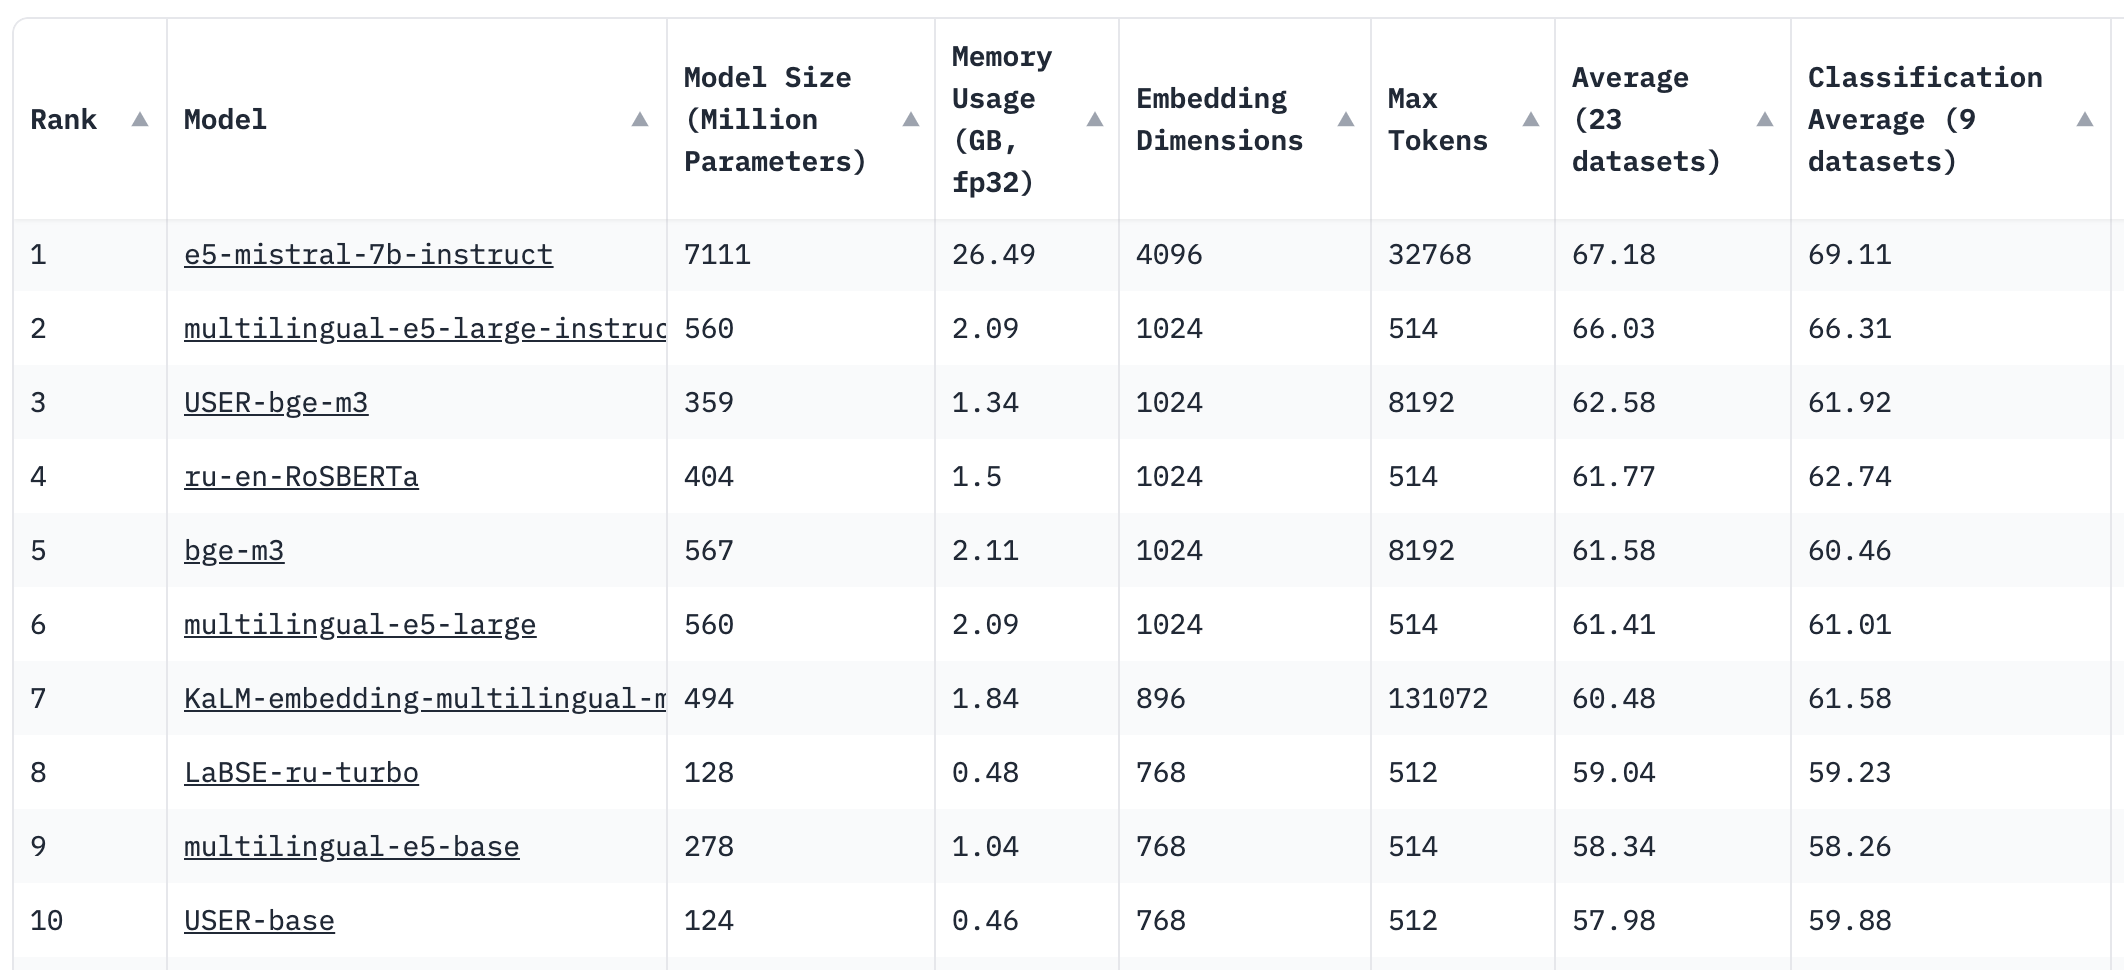

encodechka

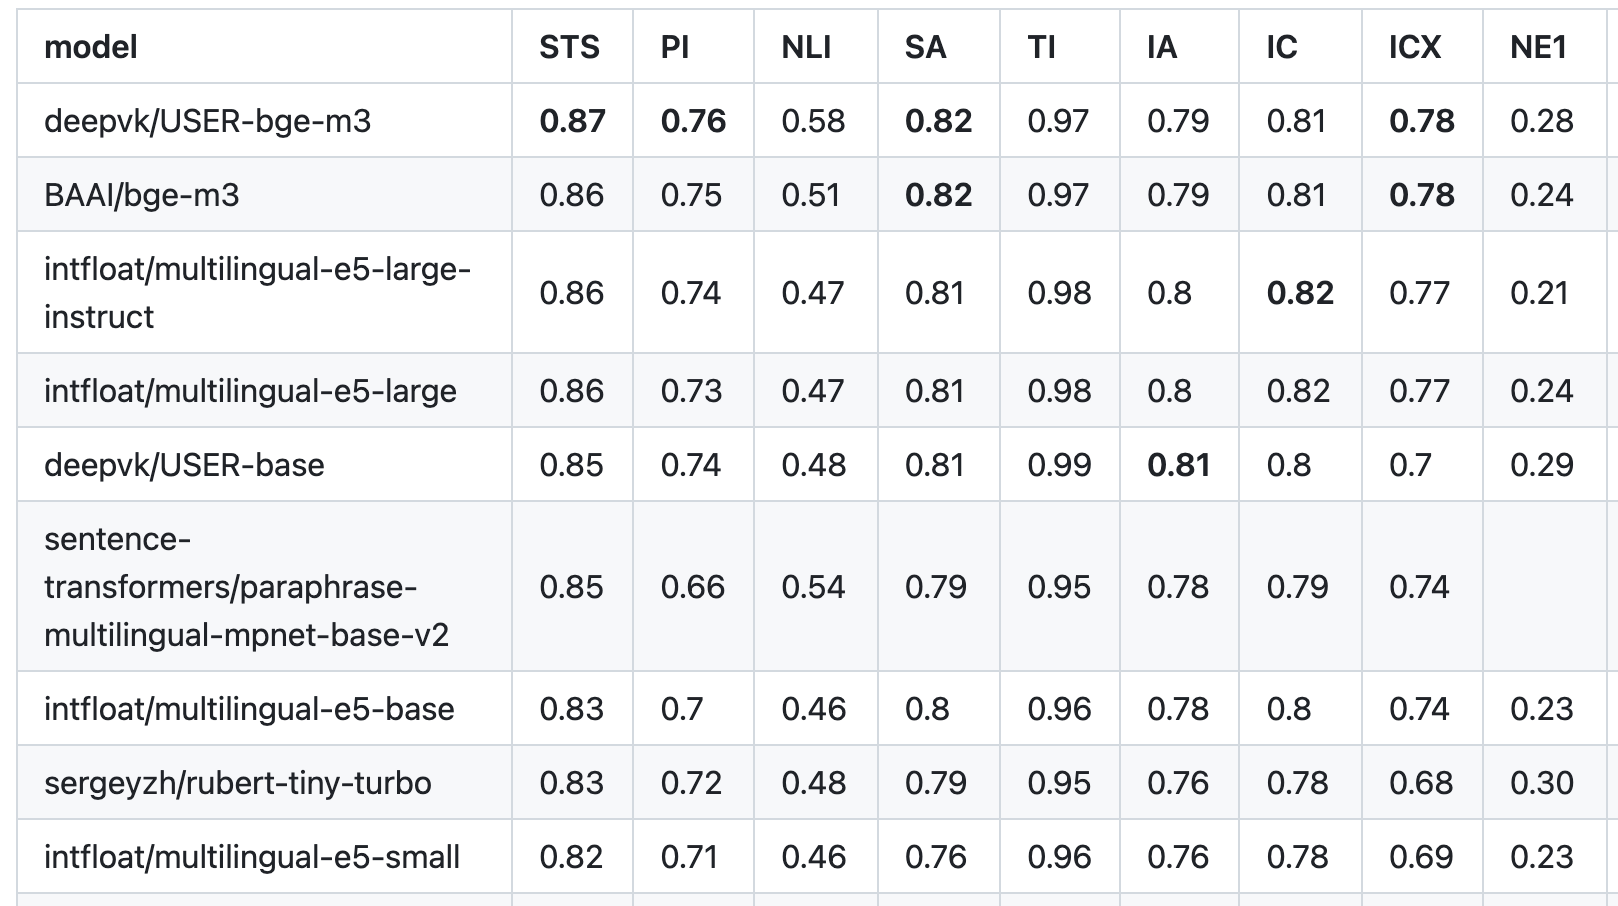

Качество моделей может сильно отличаться от домена к домену. Крайне рекомендуется дообучать энкодеры под свои домены.


Базовый класс Embeddings в LangChain предоставляет два метода:
один для векторизации документов и один для векторизации запроса.
Первый использует в качестве входных данных несколько текстов, в то время как второй использует один текст.
Причина использования этих двух отдельных методов заключается в том, что некоторые модели используют разные методы векторизации документов и запросов, например модель E5:

In [ ]:
import torch.nn.functional as F

from torch import Tensor
from transformers import AutoTokenizer, AutoModel

In [ ]:
def average_pool(last_hidden_states: Tensor,
                 attention_mask: Tensor) -> Tensor:
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]

In [ ]:
ENCODER_NAME = 'intfloat/multilingual-e5-small'

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(ENCODER_NAME)
model = AutoModel.from_pretrained(ENCODER_NAME)

tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

In [ ]:
# Each input text should start with "query: " or "passage: ", even for non-English texts.
# For tasks other than retrieval, you can simply use the "query: " prefix.
input_texts = ['query: how much protein should a female eat',
               'query: 南瓜的家常做法',
               "passage: As a general guideline, the CDC's average requirement of protein for women ages 19 to 70 is 46 grams per day. But, as you can see from this chart, you'll need to increase that if you're expecting or training for a marathon. Check out the chart below to see how much protein you should be eating each day.",
               "passage: 1.清炒南瓜丝 原料:嫩南瓜半个 调料:葱、盐、白糖、鸡精 做法: 1、南瓜用刀薄薄的削去表面一层皮,用勺子刮去瓤 2、擦成细丝(没有擦菜板就用刀慢慢切成细丝) 3、锅烧热放油,入葱花煸出香味 4、入南瓜丝快速翻炒一分钟左右,放盐、一点白糖和鸡精调味出锅 2.香葱炒南瓜 原料:南瓜1只 调料:香葱、蒜末、橄榄油、盐 做法: 1、将南瓜去皮,切成片 2、油锅8成热后,将蒜末放入爆香 3、爆香后,将南瓜片放入,翻炒 4、在翻炒的同时,可以不时地往锅里加水,但不要太多 5、放入盐,炒匀 6、南瓜差不多软和绵了之后,就可以关火 7、撒入香葱,即可出锅"]


In [ ]:
# Tokenize the input texts
batch_dict = tokenizer(input_texts, max_length=512, padding=True, truncation=True, return_tensors='pt')

outputs = model(**batch_dict)
embeddings = average_pool(outputs.last_hidden_state, batch_dict['attention_mask'])

# normalize embeddings
embeddings = F.normalize(embeddings, p=2, dim=1)
scores = (embeddings[:2] @ embeddings[2:].T) * 100
print(scores.tolist())

[[92.72809600830078, 75.96248626708984], [74.38050842285156, 90.60894775390625]]


В LangChain интегрированно большое количество различных энкодеров.   
Давайте попробуем использовать класс для HuggingFace:


In [ ]:
del model

In [ ]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings

In [ ]:
embeddings_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Базово Эмбеддер поддерживает два метода векторизации:   
embed_documents для документов и embed_query для запросов.

In [ ]:
embeddings = embeddings_model.embed_documents(
    [   "What was the name mentioned in the conversation?",
        "Hi there!",
        "Oh, hello!",
        "What's your name?",
        "My friends call me World",
        "Hello World!"
    ]
)
len(embeddings), len(embeddings[0]), embeddings[0][:5]

(6,
 768,
 [0.09514585137367249,
  9.875687101157382e-05,
  -0.01657339744269848,
  0.04484802111983299,
  0.04323701187968254])

In [ ]:
embedded_query = embeddings_model.embed_query("What was the name mentioned in the conversation?")
embedded_query[:5]

[0.09514584392309189,
 9.877218690235168e-05,
 -0.016573388129472733,
 0.044848017394542694,
 0.04323701933026314]

Обратим внимание, что вектора получились разные

Эмбеддинги могут быть сохранены или временно закэшированы, чтобы избежать необходимости их повторного вычисления.

In [ ]:
from langchain.storage import LocalFileStore
from langchain.embeddings import CacheBackedEmbeddings

In [ ]:
store = LocalFileStore("./cache/")
cached_embedder = CacheBackedEmbeddings.from_bytes_store(embeddings_model, store)

In [ ]:
%%timeit
embeddings = embeddings_model.embed_documents(
    [   "What was the name mentioned in the conversation?",
        "Hi there!",
        "Oh, hello!",
        "What's your name?",
        "My friends call me World",
        "Hello World!"
    ]
)

510 ms ± 258 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
embeddings = cached_embedder.embed_documents(texts=
    [   "What was the name mentioned in the conversation?",
        "Hi there!",
        "Oh, hello!",
        "What's your name?",
        "My friends call me World",
        "Hello World!"
    ]
)

2.64 ms ± 77 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
embeddings = cached_embedder.embed_documents(texts=
    [   "What was the name mentioned in the?",
        "Hi there!",
        "Oh, hello!",
        "What's your name?",
        "My friends call me World",
        "Hello World!"
    ]
)

In [ ]:
list(store.yield_keys())

['f26668b8-30e7-53ab-8662-6ec30ec795c9',
 '64ccba18-fc5c-58e1-abc4-e30f96f37ec2',
 '7afa8587-1536-5b7c-8705-aaca3004e913',
 'f4641f10-cc90-5791-b0f3-b2a1555dac8f',
 'edef130a-43ed-57ff-8f52-b1c7ba00e8fb',
 'b57fdad0-9cfa-5bac-9ffe-679b9e3a14a6']

### Vector stores

### Chroma

In [ ]:
from langchain_chroma import Chroma
from langchain_community.document_loaders import TextLoader
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)
from langchain_text_splitters import CharacterTextSplitter

In [ ]:
# load the document and split it into chunks
loader = TextLoader("state_of_the_union.txt")
documents = loader.load()

In [ ]:
# split it into chunks
text_splitter = CharacterTextSplitter(chunk_size=350, chunk_overlap=0)
docs = text_splitter.split_documents(documents)

In [ ]:
# create the open-source embedding function
embedding_function = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

# load it into Chroma
db = Chroma.from_documents(docs, embedding_function)

<ipython-input-103-ab2f27fe3e5c>:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_function = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# query it
query = "What did the president say about Ketanji Brown Jackson"
docs = db.similarity_search(query, k=5)

In [ ]:
print(docs[0].page_content)

One of the most serious constitutional responsibilities a President has is nominating someone to serve on the United States Supreme Court. 

And I did that 4 days ago, when I nominated Circuit Court of Appeals Judge Ketanji Brown Jackson. One of our nation’s top legal minds, who will continue Justice Breyer’s legacy of excellence.


In [ ]:
# Огромный список доступных VectorStore https://python.langchain.com/v0.1/docs/integrations/vectorstores/

### Retrievers

In [ ]:
from langchain_community.retrievers import TFIDFRetriever

retriever = TFIDFRetriever.from_documents(docs)

In [ ]:
result = retriever.invoke("Natural Language Processing")
result

[Document(metadata={'source': 'state_of_the_union.txt'}, page_content='Tonight, I’d like to honor someone who has dedicated his life to serve this country: Justice Stephen Breyer—an Army veteran, Constitutional scholar, and retiring Justice of the United States Supreme Court. Justice Breyer, thank you for your service.'),
 Document(metadata={'source': 'state_of_the_union.txt'}, page_content='While it often appears that we never agree, that isn’t true. I signed 80 bipartisan bills into law last year. From preventing government shutdowns to protecting Asian-Americans from still-too-common hate crimes to reforming military justice.'),
 Document(metadata={'source': 'state_of_the_union.txt'}, page_content='As I said last year, especially to our younger transgender Americans, I will always have your back as your President, so you can be yourself and reach your God-given potential.'),
 Document(metadata={'source': 'state_of_the_union.txt'}, page_content='As Ohio Senator Sherrod Brown says, “I

In [ ]:
retriever.save_local("testing.pkl")

In [ ]:
retriever_copy = TFIDFRetriever.load_local("testing.pkl", allow_dangerous_deserialization=True)

In [ ]:
retriever_copy.invoke("Natural Language Processing")

[Document(metadata={'source': 'state_of_the_union.txt'}, page_content='Tonight, I’d like to honor someone who has dedicated his life to serve this country: Justice Stephen Breyer—an Army veteran, Constitutional scholar, and retiring Justice of the United States Supreme Court. Justice Breyer, thank you for your service.'),
 Document(metadata={'source': 'state_of_the_union.txt'}, page_content='While it often appears that we never agree, that isn’t true. I signed 80 bipartisan bills into law last year. From preventing government shutdowns to protecting Asian-Americans from still-too-common hate crimes to reforming military justice.'),
 Document(metadata={'source': 'state_of_the_union.txt'}, page_content='As I said last year, especially to our younger transgender Americans, I will always have your back as your President, so you can be yourself and reach your God-given potential.'),
 Document(metadata={'source': 'state_of_the_union.txt'}, page_content='As Ohio Senator Sherrod Brown says, “I

In [ ]:
from langchain_community.retrievers import BM25Retriever

In [ ]:
bm25_retriever = BM25Retriever.from_documents(docs)

In [ ]:
result = bm25_retriever.invoke("Circuit Court of Appeals")

In [ ]:
for d in result:
  print(d.page_content, '\n__')

One of the most serious constitutional responsibilities a President has is nominating someone to serve on the United States Supreme Court. 

And I did that 4 days ago, when I nominated Circuit Court of Appeals Judge Ketanji Brown Jackson. One of our nation’s top legal minds, who will continue Justice Breyer’s legacy of excellence. 
__
While it often appears that we never agree, that isn’t true. I signed 80 bipartisan bills into law last year. From preventing government shutdowns to protecting Asian-Americans from still-too-common hate crimes to reforming military justice. 
__
As I said last year, especially to our younger transgender Americans, I will always have your back as your President, so you can be yourself and reach your God-given potential. 
__
As Ohio Senator Sherrod Brown says, “It’s time to bury the label “Rust Belt.” 

It’s time. 

But with all the bright spots in our economy, record job growth and higher wages, too many families are struggling to keep up with the bills.  

### Поисковик по Arxiv.org!

In [ ]:
from langchain_community.retrievers import ArxivRetriever

In [ ]:
retriever = ArxivRetriever(load_max_docs=2)

In [ ]:
docs = retriever.invoke("attention")

In [ ]:
docs

[Document(metadata={'Entry ID': 'http://arxiv.org/abs/1709.06308v1', 'Published': datetime.date(2017, 9, 19), 'Title': 'Exploring Human-like Attention Supervision in Visual Question Answering', 'Authors': 'Tingting Qiao, Jianfeng Dong, Duanqing Xu'}, page_content='Attention mechanisms have been widely applied in the Visual Question\nAnswering (VQA) task, as they help to focus on the area-of-interest of both\nvisual and textual information. To answer the questions correctly, the model\nneeds to selectively target different areas of an image, which suggests that an\nattention-based model may benefit from an explicit attention supervision. In\nthis work, we aim to address the problem of adding attention supervision to VQA\nmodels. Since there is a lack of human attention data, we first propose a Human\nAttention Network (HAN) to generate human-like attention maps, training on a\nrecently released dataset called Human ATtention Dataset (VQA-HAT). Then, we\napply the pre-trained HAN on the 

In [ ]:
docs[0].metadata

{'Entry ID': 'http://arxiv.org/abs/1709.06308v1',
 'Published': datetime.date(2017, 9, 19),
 'Title': 'Exploring Human-like Attention Supervision in Visual Question Answering',
 'Authors': 'Tingting Qiao, Jianfeng Dong, Duanqing Xu'}

In [ ]:
import os

from langchain_openai import ChatOpenAI
from langchain.chains import ConversationalRetrievalChain

In [ ]:
from getpass import getpass

OPENAI_API_KEY = getpass()
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

··········


In [ ]:
model = ChatOpenAI(model="gpt-3.5-turbo")  # switch to 'gpt-4'
qa = ConversationalRetrievalChain.from_llm(model, retriever=retriever)

In [ ]:
questions = [
    "What are Heat-bath random walks with Markov base?",
    "What is the ImageBind model?",
    "How does Compositional Reasoning with Large Language Models works?",
]
chat_history = []

for question in questions:
    result = qa.invoke({"question": question, "chat_history": chat_history})
    chat_history.append((question, result["answer"]))
    print(f"-> **Question**: {question} \n")
    print(f"**Answer**: {result['answer']} \n")

-> **Question**: What are Heat-bath random walks with Markov base? 

**Answer**: I don't have information on "Heat-bath random walks with Markov base" based on the context provided. 

-> **Question**: What is the ImageBind model? 

**Answer**: The ImageBind model is an approach that learns a joint embedding across six different modalities: images, text, audio, depth, thermal, and IMU data. It shows that only image-paired data is necessary to train this joint embedding, enabling various applications such as cross-modal retrieval, composing modalities with arithmetic, cross-modal detection, and generation. The model leverages large-scale vision-language models and extends their zero-shot capabilities to new modalities simply by using their natural pairing with images. ImageBind sets a new state-of-the-art in zero-shot recognition tasks across modalities and also demonstrates strong few-shot recognition results, outperforming previous work. It serves as a new way to evaluate vision models